In [2]:
import pandas as pd
import plotly.express as px

## Row Data, without applying Normalisation and removing Outliers

### csv uploads

In [3]:
mysportsbetting=pd.read_csv("Data\mysportsbetting.csv")                    # .csv upload
mysportsbetting.head(2)

,Sport,Wager,Paid,Winnings,Hold,Purchase_Time,Competition,Event,Event_Date,Gender_Competition,Sport_Group,Month,Day_of_Week,Sport_encoded,Purchase_Time_encoded,Competition_encoded,Event_encoded,Sport_Group_encoded
0,Basketball,1.00,0.0,1.00,1.0,Prematch,Germany Bundesliga,Alba Berlín - BG Gottingen,2024-02-13,Male,Basketball,2,1,3,1,504,1186,0
1,Basketball,42.52,0.0,42.52,1.0,Prematch,Germany Bundesliga,Alba Berlín - EWE Baskets Oldenburg,2024-03-03,Male,Basketball,3,6,3,1,504,1188,0


### Correlation overview

In [4]:
px.imshow(mysportsbetting.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_12884\1574180648.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  px.imshow(mysportsbetting.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables",


### Models

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

selected_columns=mysportsbetting[["Wager","Purchase_Time_encoded","Sport_Group_encoded"]]        #Selected columns for the model from mysportsbetting 

X = selected_columns.drop(columns=["Wager"])                                                             #Winnings is the object variable and will be "y"
y = selected_columns["Wager"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                   #Division between train(80%) and test(20%)

scaler = StandardScaler()                                                                                   #Scaler for models Ridge, Lasso, ElasticNet and PolinomialFeatures
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [                                                                                                  #Models list to apply
    LinearRegression(),
    SVR(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5),
    make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
]

model_names = []
mse_values = []
r2_values = []

for model in models:                                                                                        #Train and evaluate models from the list
    model.fit(X_train_scaled, y_train)                                                                        #Adjust the model
    y_pred = model.predict(X_test_scaled)                                                                     #Predictions
    mse = mean_squared_error(y_test, y_pred)                                                                  #Calculate the squared error     
    r2 = r2_score(y_test, y_pred)                                                                             #Calculate the coefficient of determination
    
    model_names.append(type(model).__name__)
    mse_values.append(mse)
    r2_values.append(r2)
    
    print(f"Model: {type(model).__name__}")                                                                   #Print results                                                                       
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print()

Model: LinearRegression
Mean Squared Error (MSE): 39551.43246366722
R^2 Score: 9.885150106803131e-06

Model: SVR
Mean Squared Error (MSE): 40944.21833310401
R^2 Score: -0.03520431607557151

Model: Ridge
Mean Squared Error (MSE): 39551.42743882698
R^2 Score: 1.0012194571529243e-05

Model: Lasso
Mean Squared Error (MSE): 39542.78042142279
R^2 Score: 0.00022863719469190524

Model: ElasticNet
Mean Squared Error (MSE): 39529.64151173657
R^2 Score: 0.0005608319848096066

Model: RandomForestRegressor
Mean Squared Error (MSE): 39320.13519517283
R^2 Score: 0.0058578397671398275

Model: GradientBoostingRegressor
Mean Squared Error (MSE): 40161.25992145198
R^2 Score: -0.015408555891415432

Model: Pipeline
Mean Squared Error (MSE): 39295.53897482825
R^2 Score: 0.0064797130009308646



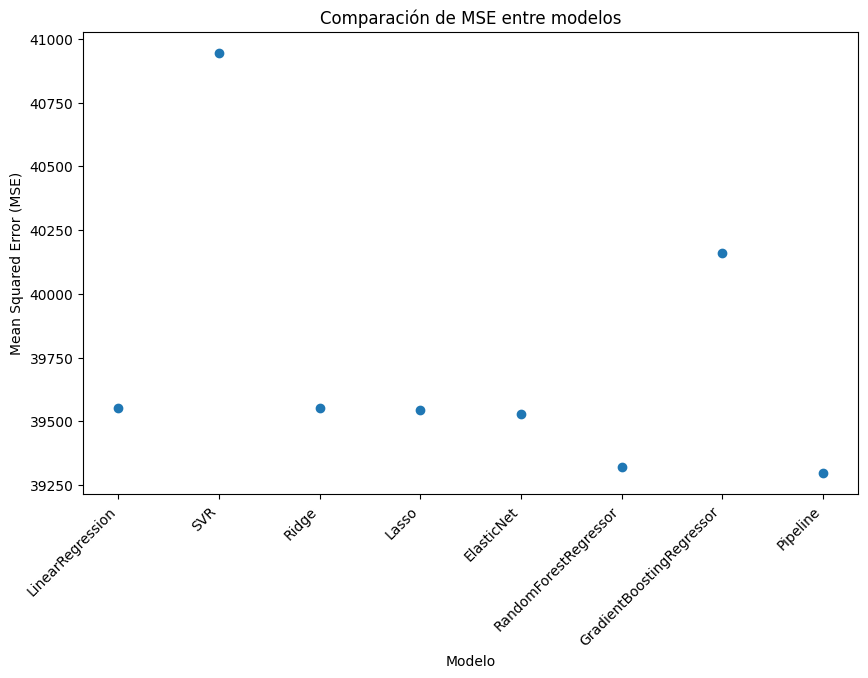

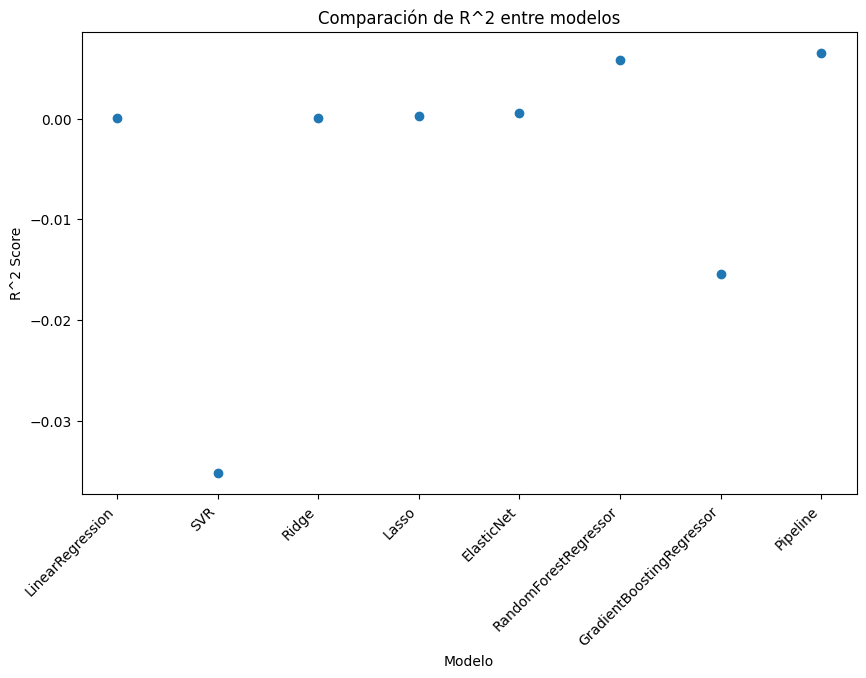

In [6]:
import matplotlib.pyplot as plt

# Gráfico para Mean Squared Error (MSE)
plt.figure(figsize=(10, 6))
plt.scatter(model_names, mse_values)
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Modelo')
plt.title('Comparación de MSE entre modelos')
plt.xticks(rotation=45, ha='right')
plt.show()

# Gráfico para R^2 Score
plt.figure(figsize=(10, 6))
plt.scatter(model_names, r2_values)
plt.ylabel('R^2 Score')
plt.xlabel('Modelo')
plt.title('Comparación de R^2 entre modelos')
plt.xticks(rotation=45, ha='right')
plt.show()

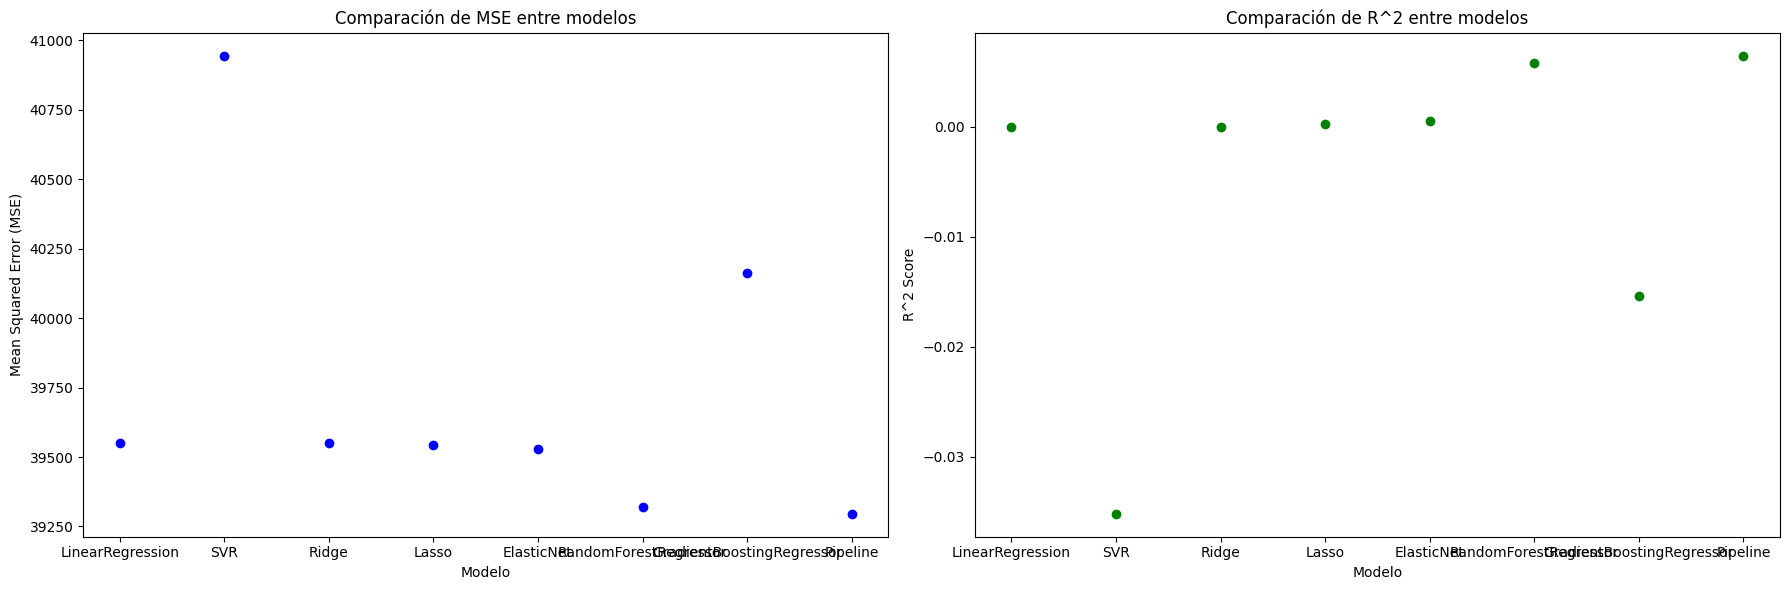

In [7]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico para Mean Squared Error (MSE)
axs[0].scatter(model_names, mse_values, color='blue')
axs[0].set_ylabel('Mean Squared Error (MSE)')
axs[0].set_xlabel('Modelo')
axs[0].set_title('Comparación de MSE entre modelos')


# Gráfico para R^2 Score
axs[1].scatter(model_names, r2_values, color='green')
axs[1].set_ylabel('R^2 Score')
axs[1].set_xlabel('Modelo')
axs[1].set_title('Comparación de R^2 entre modelos')


plt.tight_layout()
plt.show()

el MSE es bastante alto, lo que indica que el modelo tiene un error cuadrático medio considerablemente grande. Además, el R^2 Score es negativo, lo que sugiere que el modelo no se ajusta bien a los datos y es probable que esté teniendo un desempeño deficiente en la tarea de predicción. Es posible que se necesite explorar modelos más complejos o realizar más ajustes en los datos para mejorar el rendimiento del modelo.

## Cleaned Data, applying Normalisation and removing Outliers

### csv upload

In [8]:
mysportsbetting_filtered=pd.read_csv("Data/mysportsbetting_filtered.csv")                    # .csv upload
mysportsbetting_filtered.head(2)

,Sport,Wager,Paid,Winnings,Hold,Purchase_Time,Competition,Event,Event_Date,Gender_Competition,Sport_Group,Month,Day_of_Week,Sport_encoded,Purchase_Time_encoded,Competition_encoded,Event_encoded,Sport_Group_encoded
0,Basketball,-0.101985,0.0,-0.012107,0.0,Prematch,Germany Bundesliga,Alba Berlín - BG Gottingen,2024-02-13,Male,Basketball,0.0,-1.000000,3,1,504,1186,0
1,Basketball,2.186880,0.0,5.014528,0.0,Prematch,Germany Bundesliga,Alba Berlín - EWE Baskets Oldenburg,2024-03-03,Male,Basketball,0.5,0.666667,3,1,504,1188,0


### Correlation overview

In [9]:
px.imshow(mysportsbetting_filtered.corr("spearman").round(2), text_auto=True, title="Spearman Correlation between numerical variables", 
          template="plotly_dark", color_continuous_scale="RdBu_r", width=900, height=600)

C:\Users\mayin\AppData\Local\Temp\ipykernel_12884\848038763.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### Modelos

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

selected_columns=mysportsbetting_filtered[["Wager","Purchase_Time_encoded","Sport_Group_encoded"]]        #Selected columns for the model from mysportsbetting 

X = selected_columns.drop(columns=["Wager"])                                                             #Winnings is the object variable and will be "y"
y = selected_columns["Wager"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)                   #Division between train(80%) and test(20%)

scaler = StandardScaler()                                                                                   #Scaler for models Ridge, Lasso, ElasticNet and PolinomialFeatures
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [                                                                                                  #Models list to apply
    LinearRegression(),
    SVR(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5),
    make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())
]

model_names = []                                                                                           #Create list for results in order to use them latter on graphs
mse_values = []
r2_values = []

for model in models:                                                                                        #Train and evaluate models from the list
    model.fit(X_train_scaled, y_train)                                                                        #Adjust the model
    y_pred = model.predict(X_test_scaled)                                                                     #Predictions
    mse = mean_squared_error(y_test, y_pred)                                                                  #Calculate the squared error     
    r2 = r2_score(y_test, y_pred)                                                                             #Calculate the coefficient of determination
    
    model_names.append(type(model).__name__)                                                                  # Add results in the lists before created
    mse_values.append(mse)
    r2_values.append(r2)
    
    print(f"Model: {type(model).__name__}")                                                                   #Print results                                                                      
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R^2 Score: {r2}")
    print()

Model: LinearRegression
Mean Squared Error (MSE): 67.15909458828787
R^2 Score: 0.002047701345662789

Model: SVR
Mean Squared Error (MSE): 69.0169297093088
R^2 Score: -0.02555884756494331

Model: Ridge
Mean Squared Error (MSE): 67.15909700144296
R^2 Score: 0.002047665487322603

Model: Lasso
Mean Squared Error (MSE): 67.30600525508768
R^2 Score: -0.00013532149775818958

Model: ElasticNet
Mean Squared Error (MSE): 67.30600525508768
R^2 Score: -0.00013532149775818958

Model: RandomForestRegressor
Mean Squared Error (MSE): 66.83070551142949
R^2 Score: 0.006927407305262867

Model: GradientBoostingRegressor
Mean Squared Error (MSE): 68.06931196609298
R^2 Score: -0.011477697262288977

Model: Pipeline
Mean Squared Error (MSE): 66.80684152200058
R^2 Score: 0.007282014871842324



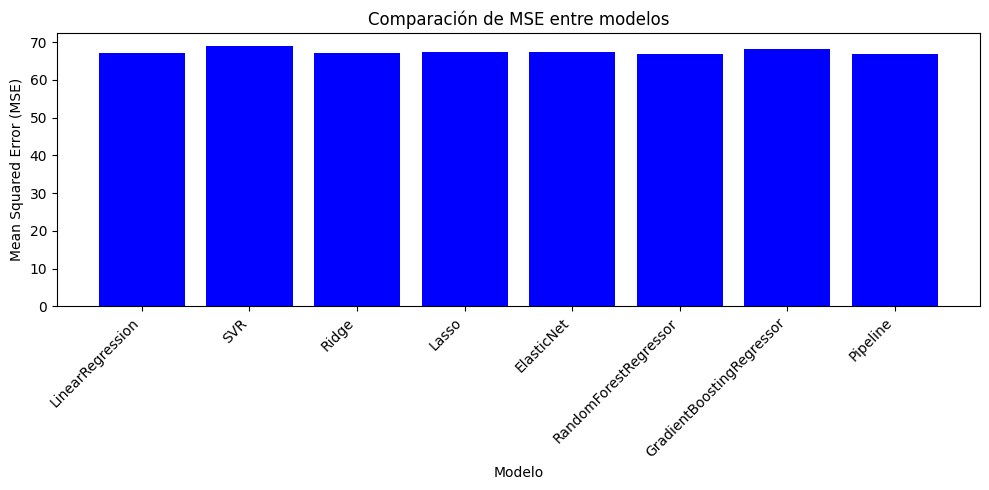

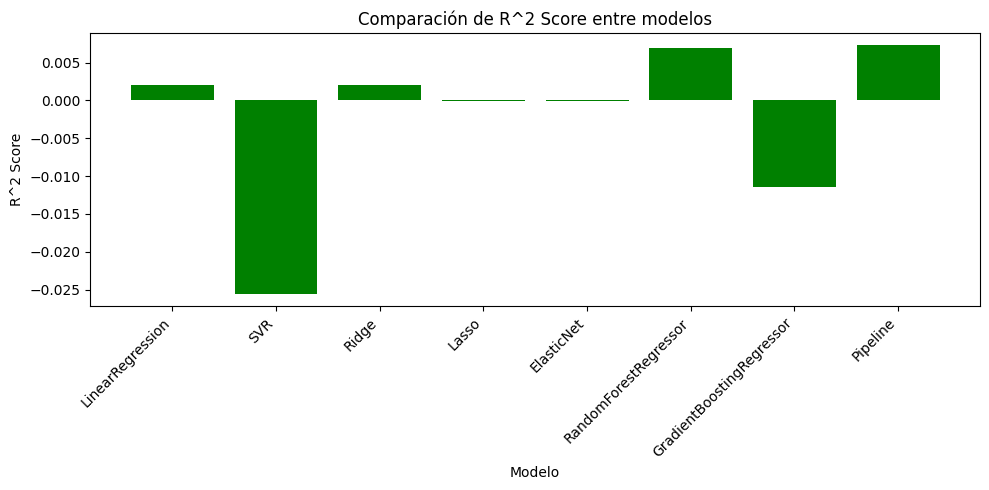

In [11]:
import matplotlib.pyplot as plt

# Graficar el MSE
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='blue')
plt.title('Comparación de MSE entre modelos')
plt.xlabel('Modelo')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graficar el R^2 Score
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color='green')
plt.title('Comparación de R^2 Score entre modelos')
plt.xlabel('Modelo')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

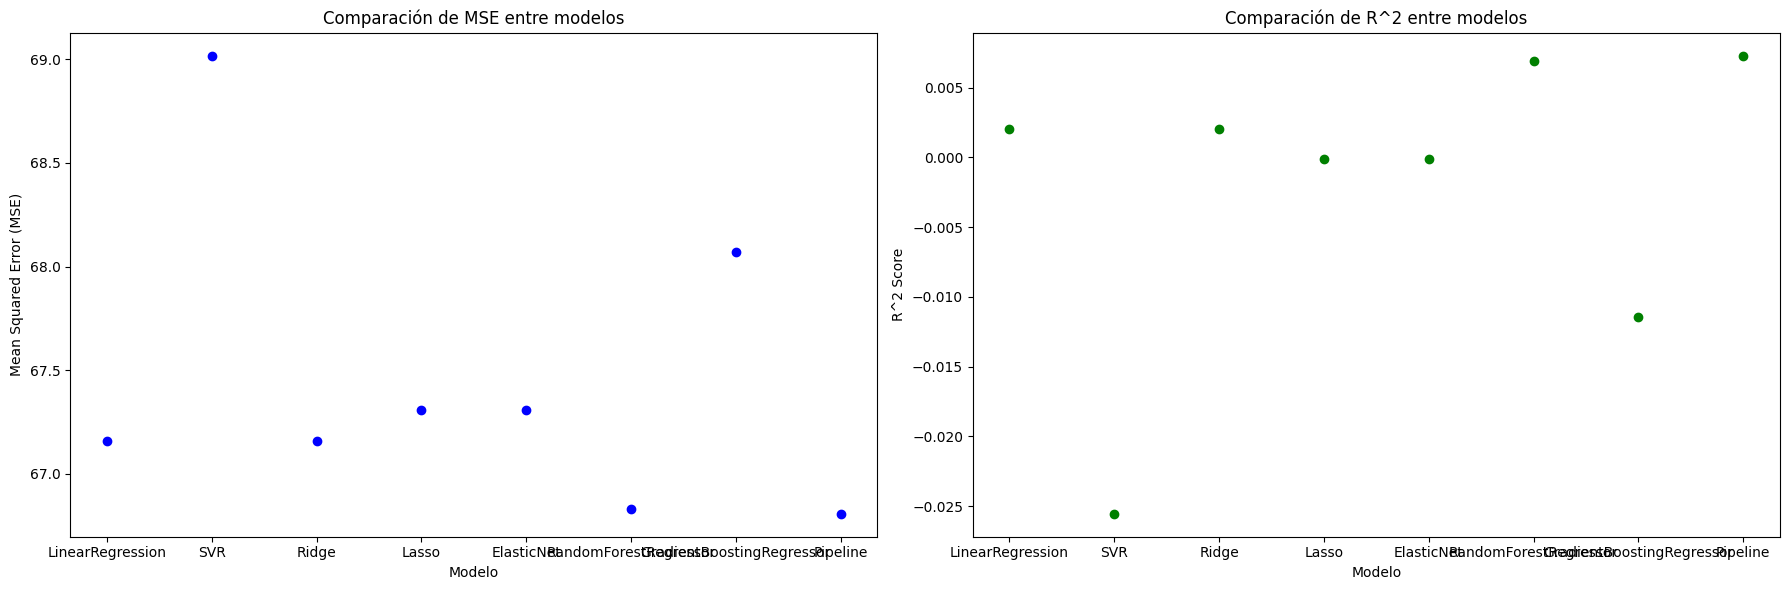

In [12]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico para Mean Squared Error (MSE)
axs[0].scatter(model_names, mse_values, color='blue')
axs[0].set_ylabel('Mean Squared Error (MSE)')
axs[0].set_xlabel('Modelo')
axs[0].set_title('Comparación de MSE entre modelos')


# Gráfico para R^2 Score
axs[1].scatter(model_names, r2_values, color='green')
axs[1].set_ylabel('R^2 Score')
axs[1].set_xlabel('Modelo')
axs[1].set_title('Comparación de R^2 entre modelos')


plt.tight_layout()
plt.show()

## Comparision

El modelo que parece tener el mejor rendimiento en términos de menor error cuadrático medio (MSE) y mayor coeficiente de determinación (R^2) es el RandomForestRegressor. Aunque el aumento en el R^2 es modesto, su MSE es ligeramente más bajo en comparación con otros modelos.

El RandomForestRegressor es conocido por su capacidad para manejar datos no lineales y capturar relaciones complejas entre las características y la variable objetivo. Además, al ser un modelo de conjunto que combina múltiples árboles de decisión, tiende a generalizar bien a datos nuevos y desconocidos.

## Selected model: RandomForestRegressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Aplicar RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Imprimir resultados
print(f"Model: RandomForestRegressor")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R^2 Score: {rf_r2}")
print(f"Prediction: {rf_y_pred}")
print()

Model: RandomForestRegressor
Mean Squared Error (MSE): 66.82839256744357
R^2 Score: 0.006961776556092536
Prediction: [1.81983764 1.33450707 1.81983764 ... 1.81983764 1.87095202 1.81983764]



## New manual Prediction

In [14]:
selected_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
Wager,22482.0,1.502843,8.368932,-0.15656,-0.129548,-0.02591,0.565601,389.499449
Purchase_Time_encoded,22482.0,0.673072,0.469101,0.00000,0.000000,1.00000,1.000000,1.000000
Sport_Group_encoded,22482.0,1.390979,1.176163,0.00000,1.000000,1.00000,1.000000,5.000000


### With created new random data

In [15]:
import numpy as np

# Generar nuevas entradas aleatorias
new_data = []
for _ in range(5):  # Generar 5 nuevas entradas
    # Generar valores aleatorios para cada característica en el rango adecuado

    purchase_time_encoded = np.random.choice([0, 1])  # Valores binarios para Purchase_Time_encoded
    sport_group_encoded = np.random.choice([0, 5])    # Valores binarios para Sport_Group_encoded
    
    # Agregar la nueva entrada a la lista
    new_data.append([purchase_time_encoded, sport_group_encoded])

# Convertir la lista de nuevas entradas a un array numpy
new_data = np.array(new_data)

# Imprimir las nuevas entradas generadas
print("Nuevas entradas generadas aleatoriamente:")
print(new_data)

Nuevas entradas generadas aleatoriamente:
[[0 0]
 [1 0]
 [0 5]
 [1 5]
 [1 5]]


In [16]:
new_data_scaled = scaler.transform(new_data)

# Realizar la predicción usando el modelo RandomForestRegressor
prediction = rf_model.predict(new_data_scaled)

# Imprimir la predicción
print("Nueva predicción manual:")
print("Predicción de Winnings:", prediction)

Nueva predicción manual:
Predicción de Winnings: [2.97280001 1.94608092 2.40489461 2.02950799 2.02950799]


c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



### With real data

In [18]:
import numpy as np

# Datos de entrada para la predicción
new_data = np.array([
    [1, 0],
    [0, 0],
    [1, 0],
    [1, 0],
    [1, 1],
    [1, 1],
    [0, 1],
    [0, 1],
    [1, 3],
    [1, 3],
    [1, 3],
    [1, 3],
    [0, 4],
    [1, 4],
    [0, 4],
    [1, 4],
    [1, 5],
    [0, 5],
    [1, 5],
    [0, 5]
])

# Escalar los datos de entrada
new_data_scaled = scaler.transform(new_data)

# Realizar la predicción con el modelo RandomForestRegressor
predictions = rf_model.predict(new_data_scaled)

# Imprimir las predicciones
print("Predictions:")
for i, prediction in enumerate(predictions):
    print(f"Data {i+1}: {prediction}")

Predictions:
Data 1: 1.9460809188886865
Data 2: 2.9728000094097404
Data 3: 1.9460809188886865
Data 4: 1.9460809188886865
Data 5: 1.3345070710027331
Data 6: 1.3345070710027331
Data 7: 1.819837635533447
Data 8: 1.819837635533447
Data 9: 0.8158654521736592
Data 10: 0.8158654521736592
Data 11: 0.8158654521736592
Data 12: 0.8158654521736592
Data 13: 1.2124071858087784
Data 14: 1.870952020533083
Data 15: 1.2124071858087784
Data 16: 1.870952020533083
Data 17: 2.0295079921065793
Data 18: 2.404894606343471
Data 19: 2.0295079921065793
Data 20: 2.404894606343471


c:\Users\mayin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Suponiendo que tienes tus datos en la variable selected_columns

# Agrupar los datos originales por deporte y por tiempo de compra, y calcular el total de apuestas
grouped_data_wager = selected_columns.groupby(['Sport_Group_encoded', 'Purchase_Time_encoded']).agg({'Wager': 'count'}).reset_index()
grouped_data_wager.columns = ['Sport_Group_encoded', 'Purchase_Time_encoded', 'Total_Bets']

# Utilizar las características agrupadas para hacer la predicción
X_grouped_wager = grouped_data_wager[['Sport_Group_encoded', 'Purchase_Time_encoded', 'Total_Bets']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_grouped_wager, X_test_grouped_wager = train_test_split(X_grouped_wager, test_size=0.2, random_state=42)

# Escalar los datos de características
scaler = StandardScaler()
X_train_grouped_wager_scaled = scaler.fit_transform(X_train_grouped_wager)
X_test_grouped_wager_scaled = scaler.transform(X_test_grouped_wager)

# Crear una variable dummy y_train con ceros
y_train_grouped_wager_dummy = np.zeros(X_train_grouped_wager_scaled.shape[0])

# Crear y entrenar el modelo RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_grouped_wager_scaled, y_train_grouped_wager_dummy)

# Realizar la predicción con el modelo entrenado
predictions_grouped_wager = rf_model.predict(X_test_grouped_wager_scaled)

# Imprimir las predicciones agrupadas por deporte y tiempo de compra
print("Predictions:")
for i, prediction in enumerate(predictions_grouped_wager):
    print(f"Sport Group: {X_test_grouped_wager.iloc[i]['Sport_Group_encoded']}, Purchase Time: {X_test_grouped_wager.iloc[i]['Purchase_Time_encoded']}, Predicted Total Wager: {prediction}")

Predictions:
Sport Group: 5, Purchase Time: 0, Predicted Total Wager: 0.0
Sport Group: 0, Purchase Time: 1, Predicted Total Wager: 0.0
